# ADEPT/Fuyu-8B

Fuyu-8Bは、Adept AIによって開発された多様なモードを持つテキストと画像のトランスフォーマーモデルです。また、エージェント用に最適化されており、任意の画像解像度のサポート、グラフやダイアグラムに関する質問の回答、UIベースの質問への対応、画面画像の細かなローカライゼーションが可能です。さらに、大きい画像に対するレスポンスを100ミリ秒未満で提供できる高速性を備えています。標準的な画像理解ベンチマークでも高い性能を発揮します。
- HuggingFace：https://huggingface.co/adept/fuyu-8b

<a href="https://colab.research.google.com/github/fuyu-quant/data-science-wiki/blob/main/multimodal/vision_language_model/adept_fuyu-8b.ipynb" target="_blank" rel="noopener noreferrer"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
%%capture
!pip install accelerate

In [1]:
from transformers import FuyuProcessor, FuyuForCausalLM
from PIL import Image
import requests

### データの用意

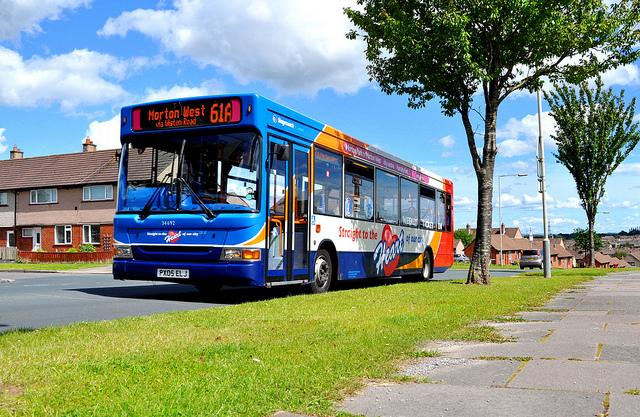

In [4]:
text_prompt = "Generate a coco-style caption.\n"
url = "https://huggingface.co/adept/fuyu-8b/resolve/main/bus.png"
image = Image.open(requests.get(url, stream=True).raw)
image

### Fuyu8Bのダウンロード

In [2]:
processor = FuyuProcessor.from_pretrained("adept/fuyu-8b")
model = FuyuForCausalLM.from_pretrained("adept/fuyu-8b", device_map="cuda:0")

preprocessor_config.json:   0%|          | 0.00/192 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/848 [00:00<?, ?B/s]

tokenizer.model:   0%|          | 0.00/6.13M [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/16.5M [00:00<?, ?B/s]

added_tokens.json:   0%|          | 0.00/27.0 [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/156 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/768 [00:00<?, ?B/s]

model.safetensors.index.json:   0%|          | 0.00/58.2k [00:00<?, ?B/s]

model-00001-of-00002.safetensors:   0%|          | 0.00/9.93G [00:00<?, ?B/s]

model-00002-of-00002.safetensors:   0%|          | 0.00/8.88G [00:00<?, ?B/s]

Loading checkpoint shards:   0%|          | 0/2 [00:00<?, ?it/s]

generation_config.json:   0%|          | 0.00/120 [00:00<?, ?B/s]

In [6]:
text_prompt = "Generate a coco-style caption.\n"

inputs = processor(text=text_prompt, images=image, return_tensors="pt").to("cuda:0")
generation_output = model.generate(**inputs, max_new_tokens=7)
generation_text = processor.batch_decode(generation_output[:, -7:], skip_special_tokens=True)
#assert generation_text == ['A blue bus parked on the side of a road.']
generation_text[0]

Setting `pad_token_id` to `eos_token_id`:71013 for open-end generation.


'A blue bus parked on the side of a road.'